In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load data
train_file_path = 'labelled_train_set.csv'
test_file_path = 'unlabelled_test2.csv'
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Data Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train_data['Article'] = train_data['Article'].apply(preprocess_text)
test_data['Article'] = test_data['Article'].apply(preprocess_text)

# Handle missing values (if any)
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Convert labels to numerical
train_data['Type'] = train_data['Type'].apply(lambda x: 1 if x == 'Human-written' else 0)


In [3]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 640.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 393.8 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 465.5 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 465.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 544.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 400.9 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 517.2 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 517.2 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 461.0 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 461.0 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/300.2 kB 485.6 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/3

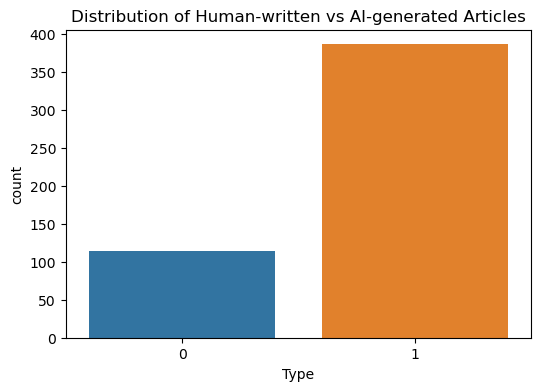

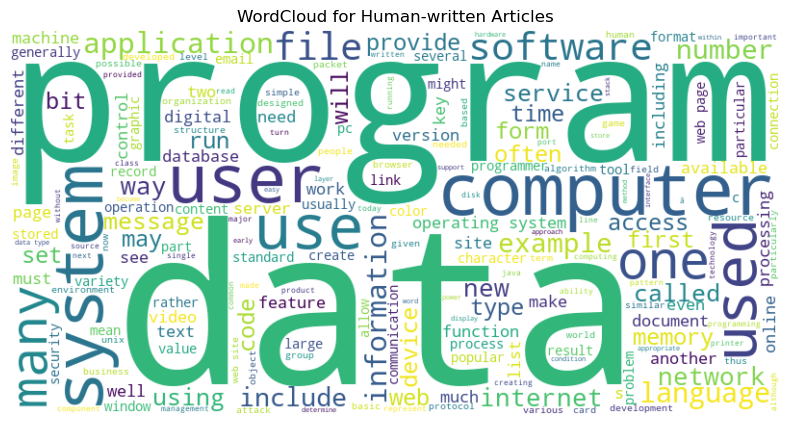

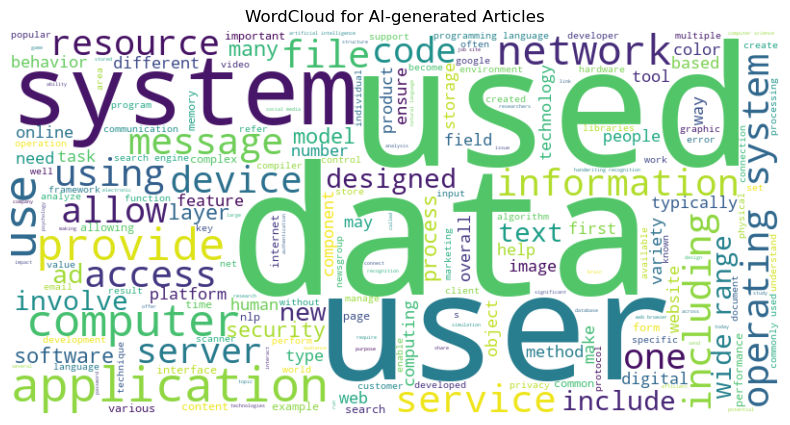

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# Visualize data distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Type')
plt.title('Distribution of Human-written vs AI-generated Articles')
plt.show()

# WordCloud for Human-written articles
human_text = ' '.join(train_data[train_data['Type'] == 1]['Article'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(human_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for Human-written Articles')
plt.axis('off')
plt.show()

# WordCloud for AI-generated articles
ai_text = ' '.join(train_data[train_data['Type'] == 0]['Article'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ai_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for AI-generated Articles')
plt.axis('off')
plt.show()


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec
import numpy as np

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(train_data['Article'])

# Word2Vec
sentences = [article.split() for article in train_data['Article']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word2vec_vectors = np.array([np.mean([word2vec_model.wv[word] for word in article if word in word2vec_model.wv]
                                     or [np.zeros(100)], axis=0) for article in sentences])


C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_cla

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.77      1.00      0.87        77

    accuracy                           0.77       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.59      0.77      0.67       100


Confusion Matrix:



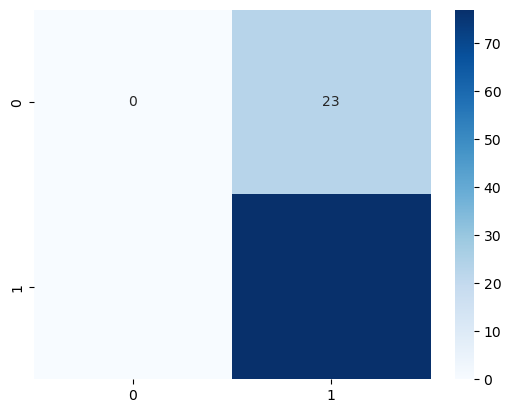

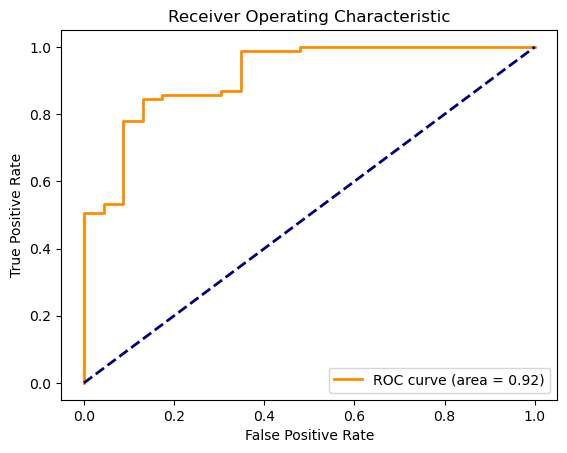

C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_cla

Support Vector Machine Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.77      1.00      0.87        77

    accuracy                           0.77       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.59      0.77      0.67       100


Confusion Matrix:



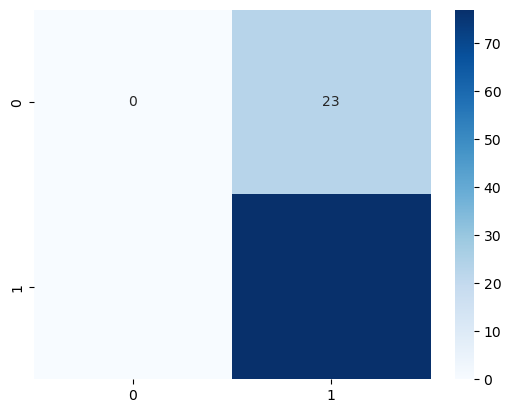

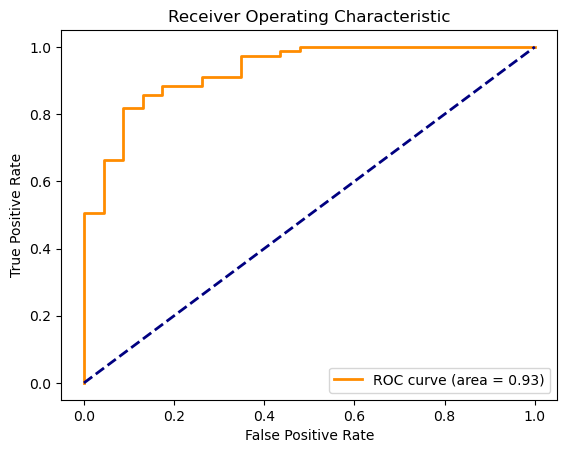

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.22      0.36        23
           1       0.81      1.00      0.90        77

    accuracy                           0.82       100
   macro avg       0.91      0.61      0.63       100
weighted avg       0.85      0.82      0.77       100


Confusion Matrix:



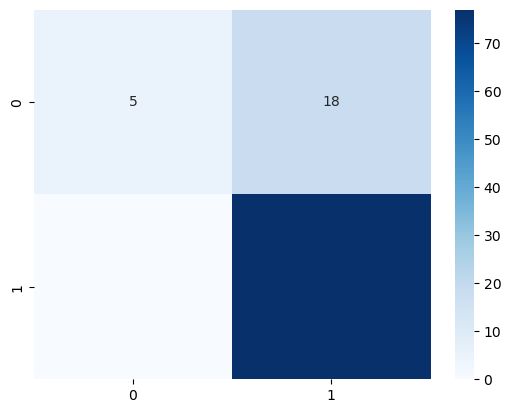

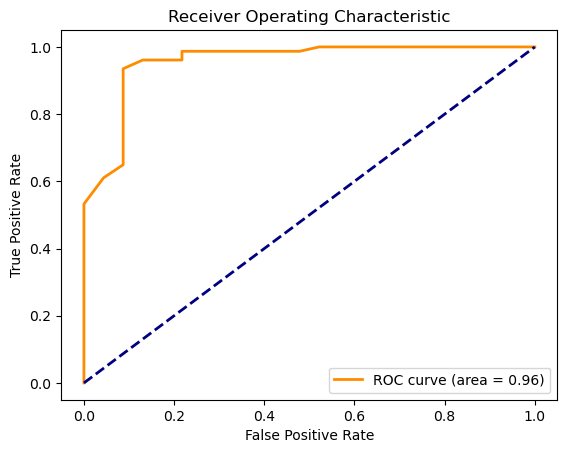

C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\Surabhi\Lib\site-packages\sklearn\metrics\_cla

Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.77      1.00      0.87        77

    accuracy                           0.77       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.59      0.77      0.67       100


Confusion Matrix:



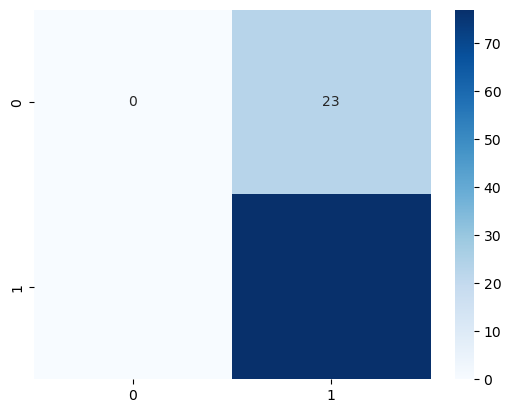

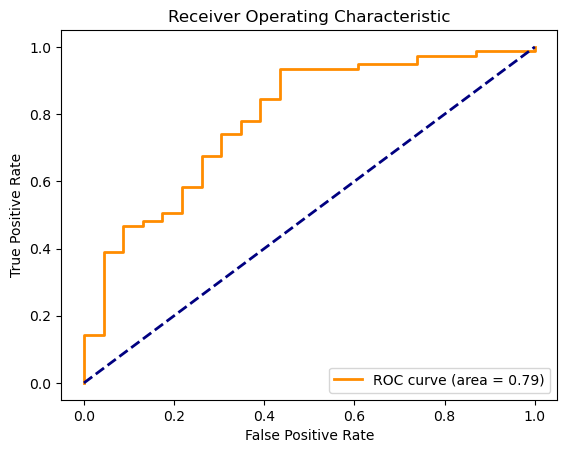

Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.39      0.53        23
           1       0.84      0.97      0.90        77

    accuracy                           0.84       100
   macro avg       0.83      0.68      0.72       100
weighted avg       0.84      0.84      0.82       100


Confusion Matrix:



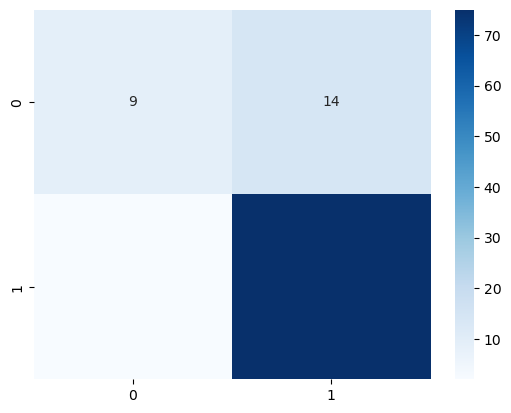

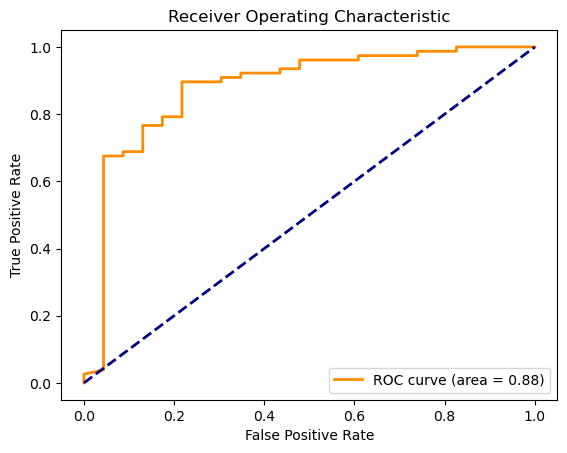

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, train_data['Type'], test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
best_model = None
best_score = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]
    report = classification_report(y_val, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    print(f"{name} Classification Report:\n")
    print(classification_report(y_val, y_pred))
    print("\nConfusion Matrix:\n")
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    if f1_score > best_score:
        best_score = f1_score
        best_model = model


In [7]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

estimators = [
    ('rf', RandomForestClassifier()),
    ('svr', SVC(probability=True))
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
print(f"Stacking Model Classification Report:\n")
print(classification_report(y_val, y_pred))


Stacking Model Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.90      0.96      0.93        77

    accuracy                           0.89       100
   macro avg       0.87      0.81      0.83       100
weighted avg       0.89      0.89      0.89       100



In [9]:
# Load the test dataset
test_data = pd.read_csv(test_file_path)

# Feature Extraction for test data
X_test = tfidf_vectorizer.transform(test_data['Article'])

# Predict using the best model
test_data['Predicted Type'] = best_model.predict(X_test)

# Convert predictions to required format
test_data['Predicted Type'] = test_data['Predicted Type'].apply(lambda x: 0 if x == 1 else 1)

# Create submission file
submission = test_data[['ID', 'Predicted Type']]
submission_file_path = 'submission_file.csv'
submission.to_csv(submission_file_path, index=False)

print("Submission file created successfully!")


Submission file created successfully!
